## Bài tập 2 - 21127113

21127113 - Đinh Dương Hải Nam

## Hoeffding Inequality
*(Question 1. and 2.)*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

Declaring Variables & Constants

In [2]:
tests = 100000 # Number of test cases
N = 1000 # Number of coins
flips = 10 # number of flips each coin
ratio = 0.5 # ratio of each coin's side

Flip a coin 10 times with ratio 0.5 each side. Returning a array of (100.000 x 1.000) with each value is ***count of heads on 10 flips***. Each row is a test case with 1000 coins, so there are 100.000 rows in total.

In [3]:
coin_binomial = rng.binomial(flips, ratio, (tests,N))
coin_binomial.shape

(100000, 1000)

Getting v1, vrand, vmin and print average of vmin

In [4]:
crand = rng.integers(0, high=N-1,size=(tests))
cmin = np.argmin(coin_binomial, axis = 1) # axis = 1 means np will take argmin on each rows

v1 = coin_binomial[...,:1].copy()
vrand = coin_binomial[np.arange(100000),crand]
vmin = coin_binomial[np.arange(100000),cmin]

# Get Ratio
v1 = v1/10
vrand= vrand/10
vmin = vmin/10

print (np.sum(vmin) / tests)

0.037483999999999996


From the above answer, the avg(vmin) is closest to 0.01 -> So the answer for 1. is **[b]**  
Now we plot all the 3 ν:

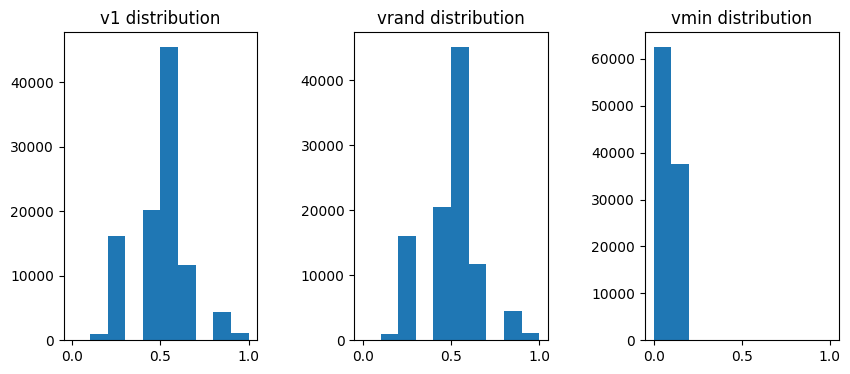

In [5]:
plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.5)
plt.subplot(131)
plt.hist(v1, bins=10)
plt.title('v1 distribution')

plt.subplot(132)
plt.hist(vrand, bins=10)
plt.title('vrand distribution')

plt.subplot(133)
plt.hist(vmin, bins=10, range=(0,1))
plt.title('vmin distribution')
plt.show()


The v1 and vrand are following Hoeffding's Inequality for single bin, while vmin is not. So the answer for 2. is **[d]**

## Error and Noise


### Question 3
We have 2 case:  
**A)** When $h(x)\neq f(x)$ and $y = f(x)$  
$$P(A) = \mu * λ$$
**B)** When $h(x) = f(x)$ and $y \neq f(x)$  
$$P(B) = (1-\mu)*(1-λ)$$

Now we sum 2 cases altogether:
$$
P[h(x) \neq y] = P[A∪B]\\
=\mu\cdot\lambda + (1 - \mu)\cdot(1 - \lambda)
$$
So the answer for 3. is **[e]**.

### Question 4
Consider replacing every answer from [a] to [d] to the equation above, we have this observation when $λ=0.5$:
$$\lambda = 1 - \lambda$$

so

$$P[h(x) \neq y] = \mu \cdot \lambda + (1 - \mu) \cdot \lambda = \lambda$$

so the answer for 4. is **[b]**

### Question 5
Here I use the data generating code from HW1

In [6]:
def generate_target_w():
    """
    Generates target_w from two random, uniformly distributed points in [-1, 1] x [-1, 1].

    Returns
    -------
    target_w : numpy array, shape (3, 1)
        The vector of parameters of f.
    """
    # Generate two points from a uniform distribution over [-1, 1]x[-1, 1]
    p1 = np.random.uniform(-1, 1, 2)
    p2 = np.random.uniform(-1, 1, 2)
    # Compute the target W from these two points
    target_w = np.array([p1[1] * p2[0] - p1[0] * p2[1], p2[1] - p1[1], p1[0] - p2[0]]).reshape((-1, 1))

    return target_w

In [7]:
def generate_data(N, target_w):
    """
    Generates a data set by generating random inputs and then using target_w to generate the
    corresponding outputs.

    Parameters
    ----------
    N : int
        The number of examples.
    target_w : numpy array, shape (3, 1)
        The vector of parameters of f.

    Returns
    -------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column of
        this matrix is all ones.
    Y : numpy array, shape (N, 1)
        The vector of outputs.
    """
    X = np.random.uniform(-1, 1, (N, 2))
    X = np.hstack((np.ones((N, 1)), X)) # Add 'ones' column
    Y = np.sign(np.dot(X, target_w))

    return X, Y

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
def main56():
  Ntrain = 100
  Ntest = 1000
  ein = 0.0
  eout = 0.0
  iterations = 1000

  for i in range(iterations):
  # generate target w
    target_w = generate_target_w()

    X, Y = generate_data(Ntrain, target_w)
    model = LinearRegression().fit(X,Y)

    X_test, Y_test = generate_data(Ntest, target_w)

    # misqualified = Y != predict(X)
    misqualified = Y != np.sign(model.predict(X))
    misqualified_test = Y_test != np.sign(model.predict(X_test))

    ein += np.sum(misqualified) / Ntrain
    eout += np.sum(misqualified_test) / Ntest

  print("Question 5: average ein = ",ein/iterations)
  print("Question 6: average eout = ",eout/iterations)


In [10]:
main56()

Question 5: average ein =  0.03960000000000004
Question 6: average eout =  0.049384000000000025


So the answer for **[5] and [6]** is **[c]. 0.01**

In [11]:
# Question 7

def run_PLA(X, Y , w): # X and Y are from in-sample
  runs = 0

  while(True):
    runs += 1

    y = np.sign(X @ w)

    misqualified = y != Y

    if (np.all(misqualified == False)):
        runs -= 1
        break

    X_mis = X[misqualified.reshape(misqualified.shape[0])]
    Y_mis = Y[misqualified][:,np.newaxis]

    i = np.random.randint(0,X_mis.shape[0])
    w = w + (Y_mis[i] * X_mis[i])[:, np.newaxis]
  return runs


In [12]:

def main7():
  N = 10
  runs = 0 # The total number of runs that PLA takes to converge
  iterations = 1000
  runavg = 0

  for i in range(iterations):
  # generate target w
    target_w = generate_target_w()

    X, Y = generate_data(N, target_w)
    model = LinearRegression().fit(X,Y)

    # get weight from the LinearRegression model
    w_predict = np.array(model.coef_).reshape((3, 1))

    runs = run_PLA(X,Y,w_predict)

    runavg += (runs * 1.0 / iterations)
  print("Average number of runs over 1000 iterations of PLA: ", runavg)

In [13]:
main7()

Average number of runs over 1000 iterations of PLA:  7.916000000000008


So the answer for question 7 is **[b] 15**

## Nonlinear Transformation

In [14]:
iterations = 1000
N = 1000

In [15]:
average_training_error = 0.0  # The average training error (E_in)

# Run the experiment 1000 times
for _ in range(iterations):
    # Generate dataset X
    X = np.random.uniform(-1, 1, (N, 2))

    # Generate Y
    X_sq = X**2
    Y = np.sign(X_sq[:, 0] + X_sq[:, 1] - 0.6)

    # Generate Y noise
    indices = np.random.choice(np.arange(N), int(N / 10), replace=False)
    Y[indices] = -Y[indices]

    # Extend feature vector to include a column of 'ones' (1, x_1, x_2)
    X = np.insert(X, 0, 1, axis=1)

    # Find the weight vector w
    X_Dagger = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    weight_vector = np.dot(X_Dagger, Y)  # The weight vector

    # Make predictions from linear regression weights
    predicted_Y = np.sign(np.dot(X, weight_vector))

    # Training error (E_in)
    training_error = sum(predicted_Y != Y) / N

    # Take the average training error to reduce variation in results
    average_training_error += (training_error * 1.0 / iterations)

print('average_training_error = %f' % (average_training_error))

average_training_error = 0.504082


So the answer for 8. is **[d] 0.5**

In [16]:
average_agreement_a = 0.0  # Average probability of agreement for hypothesis [a]
average_agreement_b = 0.0  # Average probability of agreement for hypothesis [b]
average_agreement_c = 0.0  # Average probability of agreement for hypothesis [c]
average_agreement_d = 0.0  # Average probability of agreement for hypothesis [d]
average_agreement_e = 0.0  # Average probability of agreement for hypothesis [e]

def f(x):
    return np.sign(x[0]**2 + x[1]**2 - 0.6).astype(int)

for _ in range(iterations):
    # Generate dataset X
    X = np.random.uniform(-1, 1, (N, 2))

    # Extract features x1 and x2
    x1_values = X[:, 0]
    x2_values = X[:, 1]
    Y = np.apply_along_axis(f, 1, X)

    # Introduce noise by flipping the sign of the output in a randomly selected 10% subset
    noisy_indices = np.random.choice(N, int(N/10), replace=False)
    for i in noisy_indices:
        Y[i] = np.negative(Y[i])

    # Transform training data into the nonlinear feature vector: (1, x1, x2, x1x2, x1^2, x2^2)
    transformed_X = np.array([np.ones(N), x1_values, x2_values, x1_values * x2_values, x1_values**2, x2_values**2]).T

    # Find the weight vector w
    X_Dagger = np.dot(np.linalg.inv(np.dot(transformed_X.T, transformed_X)), transformed_X.T)
    weight_vector = np.dot(X_Dagger, Y)  # The weight vector

    # Make predictions from linear regression weights
    predicted_Y = np.sign(np.dot(transformed_X, weight_vector))

    # [a]
    weight_vector_a = np.array([-1, -0.05, 0.08, 0.13, 1.5, 1.5])
    predicted_Y_a = np.sign(np.dot(transformed_X, weight_vector_a))
    agreement_a = sum(predicted_Y_a == predicted_Y) / N
    average_agreement_a += (agreement_a * 1.0 / iterations)

    # [b]
    weight_vector_b = np.array([-1, -0.05, 0.08, 0.13, 1.5, 15])
    predicted_Y_b = np.sign(np.dot(transformed_X, weight_vector_b))
    agreement_b = sum(predicted_Y_b == predicted_Y) / N
    average_agreement_b += (agreement_b * 1.0 / iterations)

    # [c]
    weight_vector_c = np.array([-1, -0.05, 0.08, 0.13, 15, 1.5])
    predicted_Y_c = np.sign(np.dot(transformed_X, weight_vector_c))
    agreement_c = sum(predicted_Y_c == predicted_Y) / N
    average_agreement_c += (agreement_c * 1.0 / iterations)

    # [d]
    weight_vector_d = np.array([-1, -1.5, 0.08, 0.13, 0.05, 0.05])
    predicted_Y_d = np.sign(np.dot(transformed_X, weight_vector_d))
    agreement_d = sum(predicted_Y_d == predicted_Y) / N
    average_agreement_d += (agreement_d * 1.0 / iterations)

    # [e]
    weight_vector_e = np.array([-1, -0.05, 0.08, 1.5, 0.15, 0.15])
    predicted_Y_e = np.sign(np.dot(transformed_X, weight_vector_e))
    agreement_e = sum(predicted_Y_e == predicted_Y) / N
    average_agreement_e += (agreement_e * 1.0 / iterations)

print('average_agreement_a = %f' % (average_agreement_a))
print('average_agreement_b = %f' % (average_agreement_b))
print('average_agreement_c = %f' % (average_agreement_c))
print('average_agreement_d = %f' % (average_agreement_d))
print('average_agreement_e = %f' % (average_agreement_e))


average_agreement_a = 0.962057
average_agreement_b = 0.662697
average_agreement_c = 0.662816
average_agreement_d = 0.632975
average_agreement_e = 0.560948


average_agreement_a attaining the maximum value implies that hypothesis **[a]** is most likely to agree with a randomly chosen point. Consequently, the preferred hypothesis for question 9 is **[a]** represented by: $$g(x_1, x_2) = \text{sign}(-1 - 0.05x_1 + 0.08x_2 + 0.13x_1x_2 + 1.5x_1^2 + 1.5x_2^2)$$.

In [17]:
average_test_error = 0.0  # The average test error (E_out)

for _ in range(iterations):
    # Generate test dataset X
    test_X = np.random.uniform(-1, 1, (N, 2))
    test_x1s = test_X[:, 0]
    test_x2s = test_X[:, 1]
    test_Y = np.apply_along_axis(f, 1, test_X)

    # Simulate noise by flipping the sign of the output in a randomly selected 10% subset
    noisy_indices = np.random.choice(N, int(N/10), replace=False)
    for i in noisy_indices:
        test_Y[i] = np.negative(test_Y[i])

    # Transform test data into the nonlinear feature vector
    test_X = np.array([np.ones(N), test_x1s, test_x2s, test_x1s * test_x2s, test_x1s**2, test_x2s**2]).T

    weight_vector = np.array([-1, -0.05, 0.08, 0.13, 1.5, 1.5])  # The weight vector from Problem 9

    # Make predictions from linear regression weights
    test_Y_predict = np.sign(np.dot(test_X, weight_vector))

    # Calculate the test error (E_out)
    test_error = sum(test_Y != test_Y_predict) / N

    # Take the average test error to reduce variation in results
    average_test_error += (test_error * 1.0 / iterations)

print('average_test_error = %f' % (average_test_error))

average_test_error = 0.142860


The average test error, avg_E_out, is most proximate to the answer **[b] 0.1**.

## References:
- "HW1.ipynb" which is included in Moodle of this course
- user workflow - on [Github](https://github.com/workflow/caltech-machine-learning-homework/blob/master/HW2.ipynb)